<a href="https://colab.research.google.com/github/minshyee/BankChurnersPredictProject/blob/main/Project_BankChurners_MORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION 2 PROJECT : BANK Churners

### import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/AIBootCamp

/content/drive/MyDrive/AIBootCamp


In [ ]:
!pip install scikit-plot

In [ ]:
# !pip uninstall matplotlib
# !pip install matplotlib==3.4


Found existing installation: matplotlib 3.2.2
Uninstalling matplotlib-3.2.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.2.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.2.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib.libs/libpng16-cfdb1654.so.16.21.0
    /usr/local/lib/python3.7/dist-packages/matplotlib.libs/libz-a147dcb0.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.2.2
     |████████████████████████████████| 10.3 MB 4.5 MB/s 
ERROR: pip's dependency re

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, plot_confusion_matrix, roc_curve
import scikitplot as skplt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
origin = pd.read_csv('BankChurners.csv')
print(origin.shape)
origin

(10127, 23)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


## EDA

In [ ]:
df = origin.copy()

In [ ]:
# 마지막 2개 칼럼, 고객번호 칼럼 삭제
df = df.iloc[:, 1:-2]
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
df.describe().T.style.background_gradient(subset = ['mean'], cmap = 'YlOrBr').background_gradient(subset = ['std'], cmap = 'YlOrBr').background_gradient(subset=['max'], cmap='YlOrBr').background_gradient(subset=['75%'], cmap='YlOrBr')

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.000000,46.325960,8.016814,26.000000,41.000000,46.000000,52.000000,73.000000
Dependent_count,10127.000000,2.346203,1.298908,0.000000,1.000000,2.000000,3.000000,5.000000
Months_on_book,10127.000000,35.928409,7.986416,13.000000,31.000000,36.000000,40.000000,56.000000
Total_Relationship_Count,10127.000000,3.812580,1.554408,1.000000,3.000000,4.000000,5.000000,6.000000
Months_Inactive_12_mon,10127.000000,2.341167,1.010622,0.000000,2.000000,2.000000,3.000000,6.000000
Contacts_Count_12_mon,10127.000000,2.455317,1.106225,0.000000,2.000000,2.000000,3.000000,6.000000
Credit_Limit,10127.000000,8631.953698,9088.776650,1438.300000,2555.000000,4549.000000,11067.500000,34516.000000
Total_Revolving_Bal,10127.000000,1162.814061,814.987335,0.000000,359.000000,1276.000000,1784.000000,2517.000000
Avg_Open_To_Buy,10127.000000,7469.139637,9090.685324,3.000000,1324.500000,3474.000000,9859.000000,34516.000000
Total_Amt_Chng_Q4_Q1,10127.000000,0.759941,0.219207,0.000000,0.631000,0.736000,0.859000,3.397000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
# Changing the Attrition_Flag to 0 and 1

df["Attrition_Flag"] = df["Attrition_Flag"].map({"Existing Customer":0, "Attrited Customer":1})

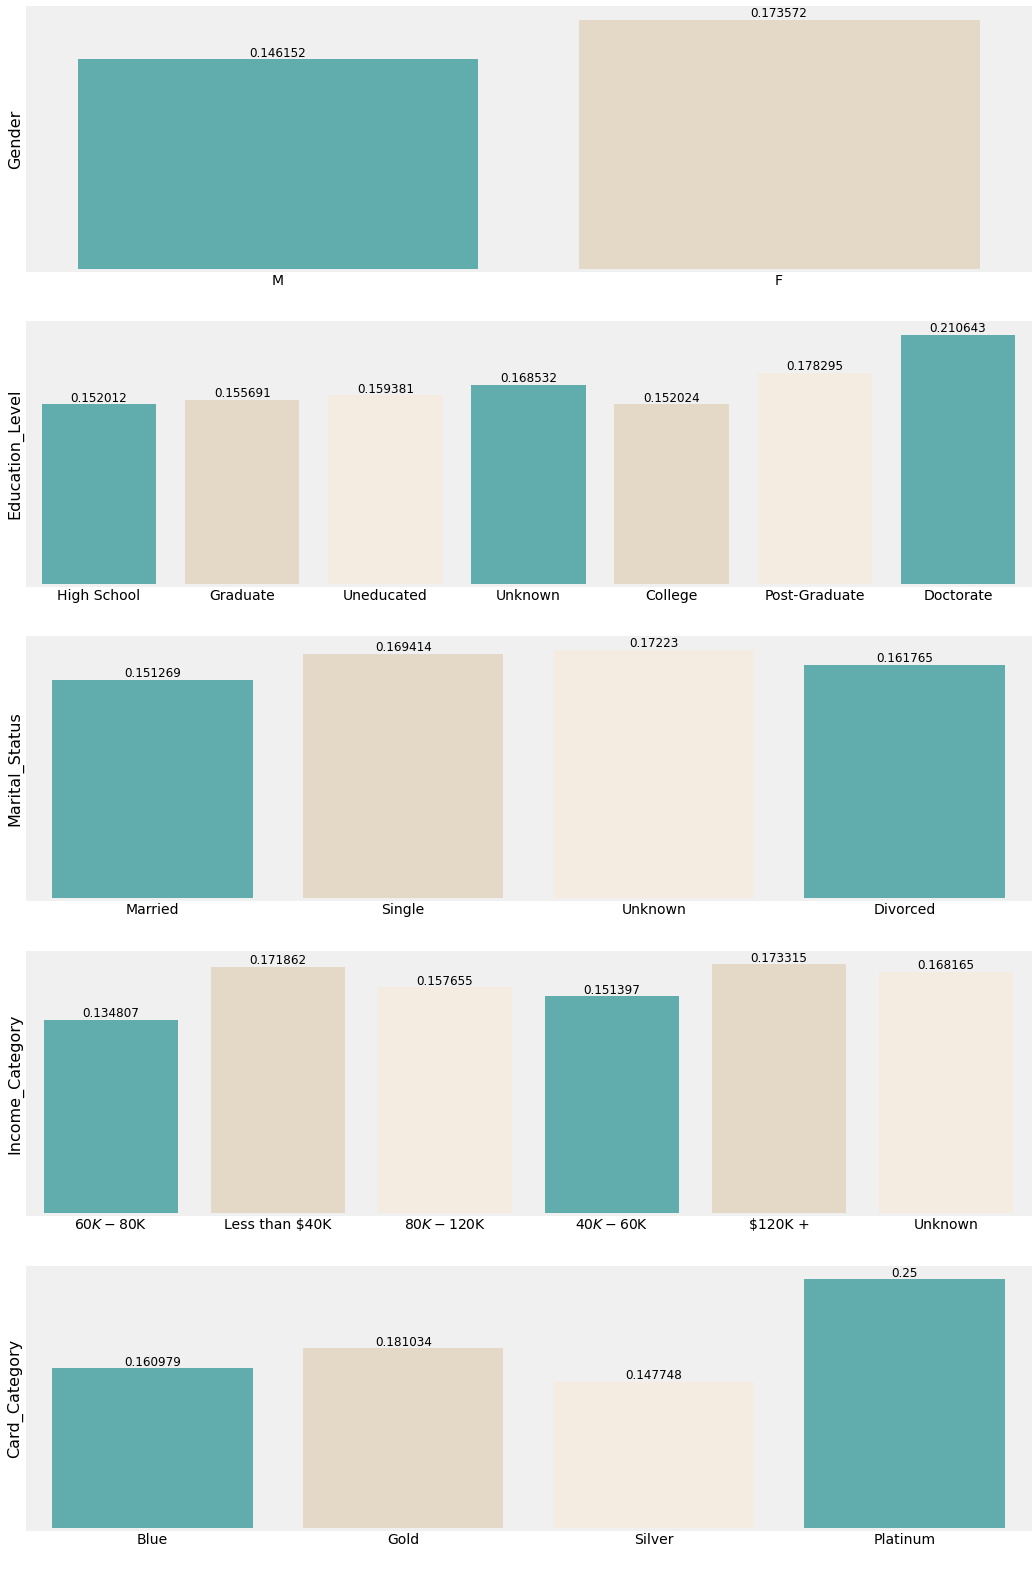

In [ ]:
# 카테고리 칼럼과 수 칼럼 나누기
num_cols = list(df.select_dtypes(['int64','float64']))
cate_cols = list(df.select_dtypes('object'))

#ax : 축 (위치 제어)
fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(16,28))
i = 0
for cols in cate_cols:
  sns.barplot(x=df[cols], y=df['Attrition_Flag'], fill=True, alpha=1, ci=None, ax=ax[i], palette=('#54BAB9', '#E9DAC1','#F7ECDE'))

  ax[i].set_xlabel(' ')
  ax[i].set_ylabel(' ')
  ax[i].xaxis.set_tick_params(labelsize=14) # X축 label 진하게 + 폰트 크게
  ax[i].tick_params(left=False, labelleft=False)
  ax[i].set_ylabel(cols, fontsize=16)
  ax[i].bar_label(ax[i].containers[0], size="12")
  ax[i].grid(False)
  i += 1

plt.show()



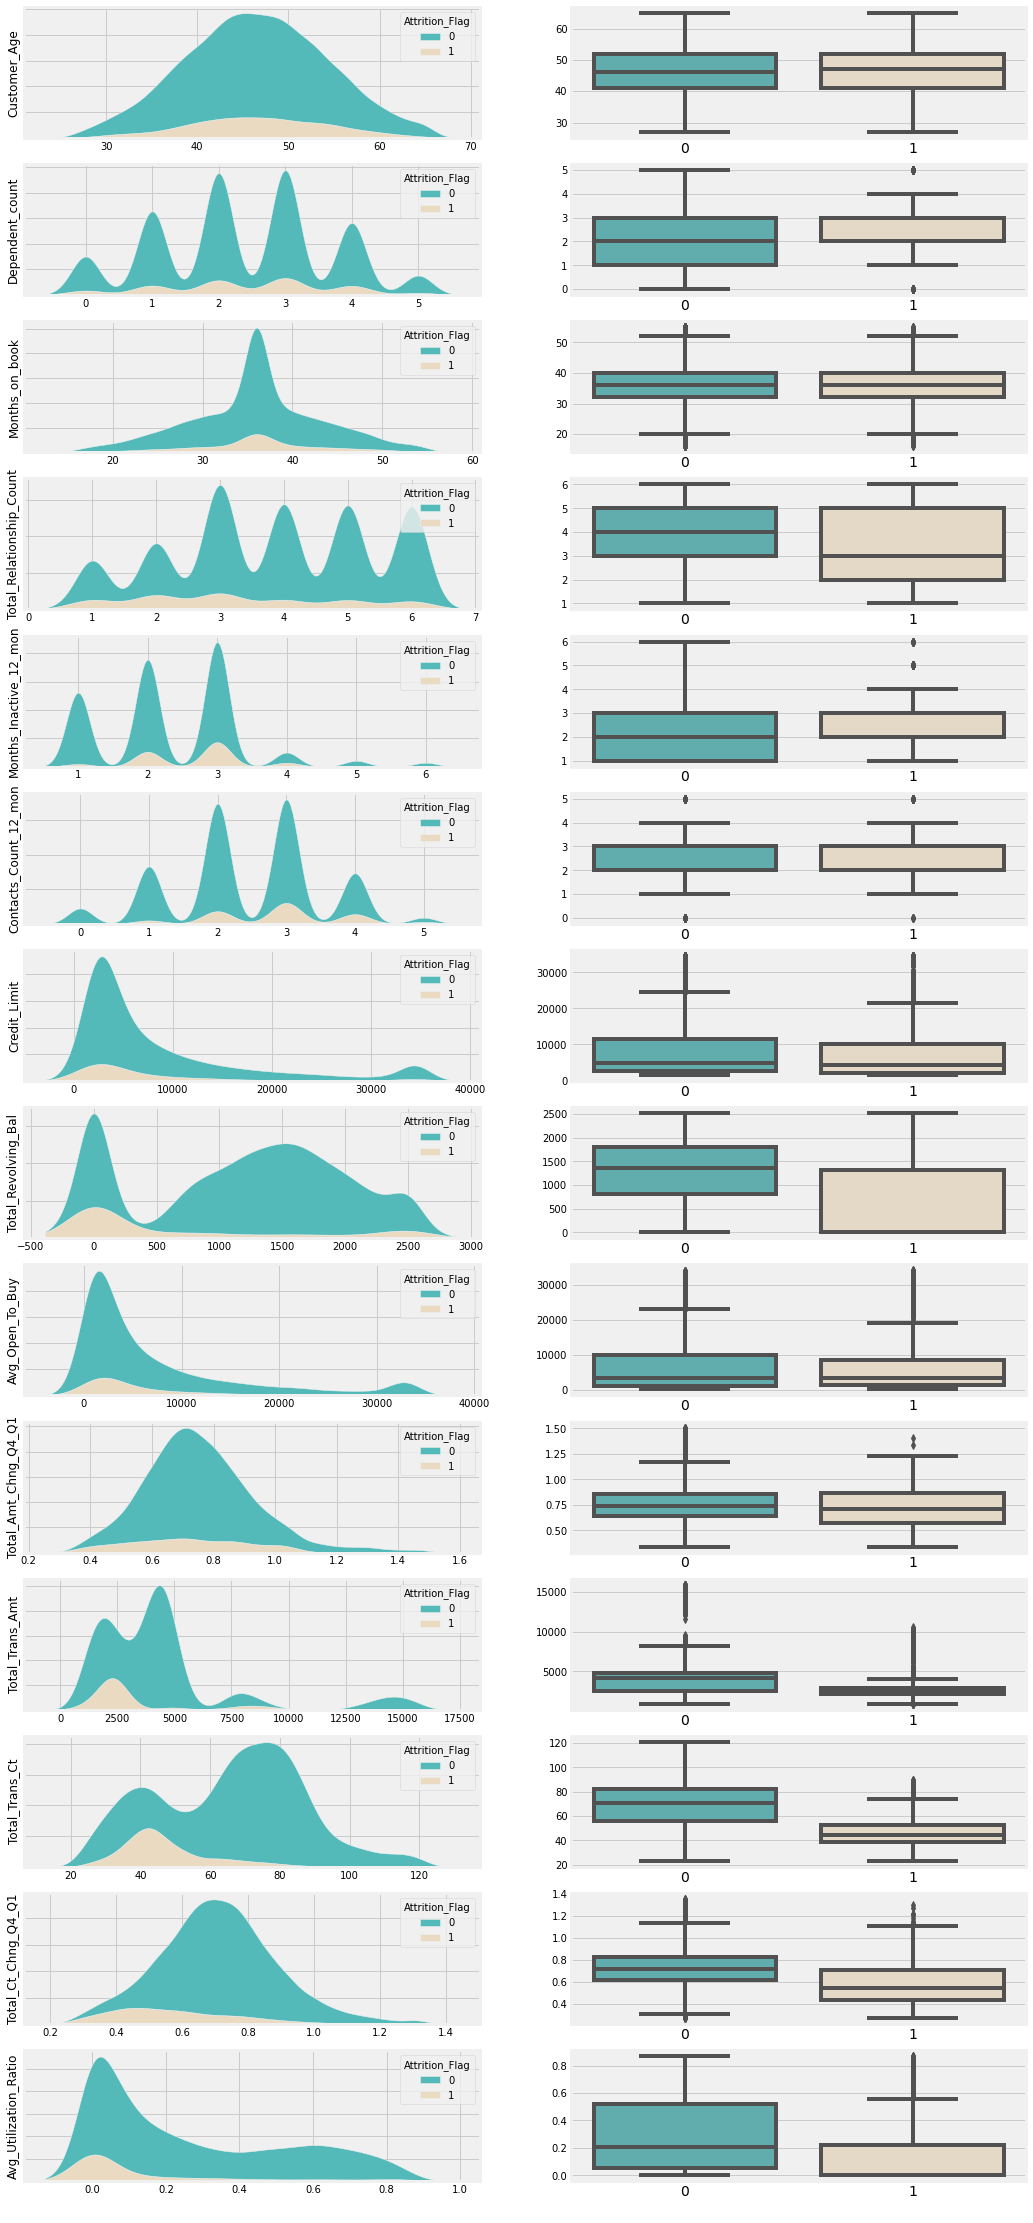

In [ ]:
# 숫자 데이터 시각화 - outlier 제거한 후
fig, ax = plt.subplots(ncols=2, nrows=14, figsize=(16,40))

i=0
for cols in num_cols[1:]: #Attrition_Flag 제외

  # Removing Outliers
  Q3 = df[cols].quantile(0.99) # 상위 0.01% 값 제거
  df = df[df[cols] <= Q3]
  Q1 = df[cols].quantile(0.01) # 하위 0.01% 값 제거
  df = df[df[cols] >= Q1]

  sns.kdeplot(df[cols], fill=True, alpha=1, hue=df['Attrition_Flag'], palette=('#54BAB9', '#E9DAC1'), multiple='stack', ax=ax[i,0])
  sns.boxplot(x=df['Attrition_Flag'], y=df[cols],  ax=ax[i,1], palette=('#54BAB9', '#E9DAC1'), color='white')

  ax[i,0].set_xlabel(' ')
  ax[i,1].set_xlabel(' ')
  ax[i,1].set_ylabel(' ')
  ax[i,1].xaxis.set_tick_params(labelsize=14)
  ax[i,0].tick_params(left=False, labelleft=False)
  ax[i,0].set_ylabel(cols, fontsize=12)
  i+=1

plt.show()


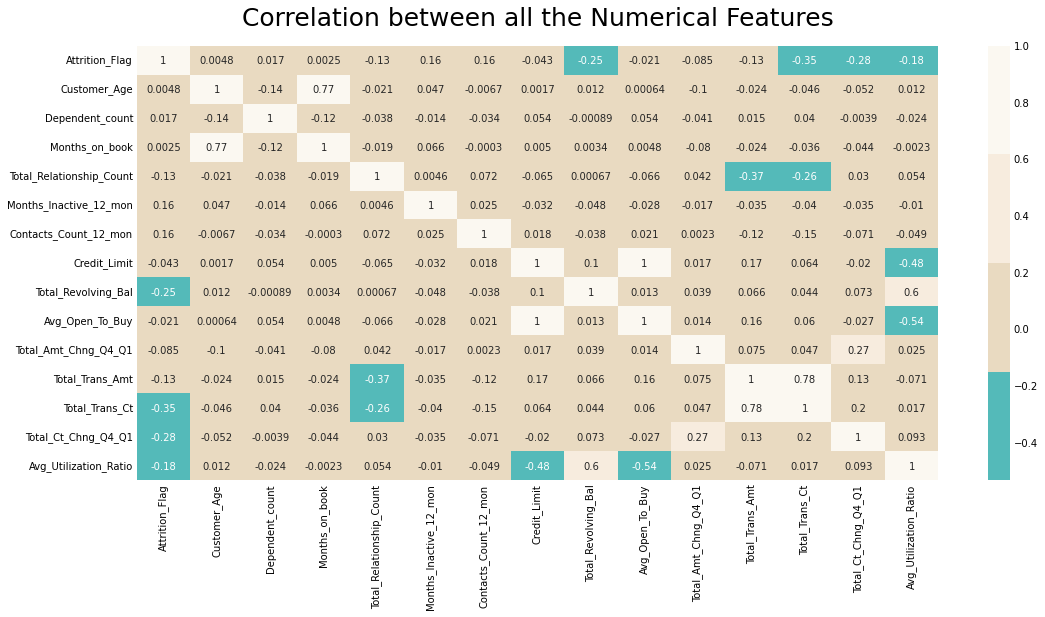

In [ ]:
# heatmap of numerical data

heat = df.corr() # correlation of numerical data
plt.figure(figsize=[16,8])
plt.title("Correlation between all the Numerical Features", size=25, pad=20)
sns.heatmap(heat, cmap=['#54BAB9', '#E9DAC1','#F7ECDE','#FBF8F1'], annot=True)
plt.show()

In [ ]:
# checking imabalance

fig = px.pie(df, values=df['Attrition_Flag'].value_counts(), color=df['Attrition_Flag'].unique(), color_discrete_map={0:"#54BAB9", 1:"#E9DAC1"},
             title='Imbalance in Target Feature', names=df["Attrition_Flag"].unique())
fig.show()

### ❗ data imbalanced ==> 해소해 줄 필요가 있음!

In [ ]:
# 카테고리 칼럼 encoding
# train, test set 분리
# 정규화
# 불균형 데이터 맞춰주기

In [ ]:
# 카테고리 칼럼 encoding -> get_dummies 이용

for col in cate_cols:
  dummy_cols = pd.get_dummies(df[col], drop_first=True, prefix=col)
  df = pd.concat([df, dummy_cols], axis =1) # 바꾼 값 다시 df에 합치기
  df.drop(columns=col, inplace=True)

In [ ]:
# split train, test
y = df.pop("Attrition_Flag")
X = df #행렬이라서

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, random_state=42)

In [ ]:
df.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [ ]:
num_cols

['Attrition_Flag',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [ ]:
# Normalizing the data
req_cols = num_cols[1:]

#MinMaxScaler 사용
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train[req_cols])
X_test = scaler.transform(X_test[req_cols])

In [ ]:
# imbalanced data 보정하기 - SMOTE
sm = SMOTE(random_state=42, sampling_strategy=1.0) # upsampling ratio
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
# XGBoost model

xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, n_jobs=-1, n_estimators=1000, max_depth=6)

xgb_model.fit(X_train, y_train)

XGBClassifier(max_depth=6, n_estimators=1000, n_jobs=-1, random_state=42,
              use_label_encoder=False)

In [ ]:
# XGBoost Score on the test data

xgb_model.score(X_test, y_test)

0.9720638540478905

In [ ]:
# Checking the Classification Report (Hidden Input)

print(classification_report(y_test, xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1511
           1       0.89      0.91      0.90       243

    accuracy                           0.97      1754
   macro avg       0.94      0.94      0.94      1754
weighted avg       0.97      0.97      0.97      1754



In [ ]:
section2=['#54BAB9', '#E9DAC1','#F7ECDE','#FBF8F1']
s2 = sns.color_palette(section2)

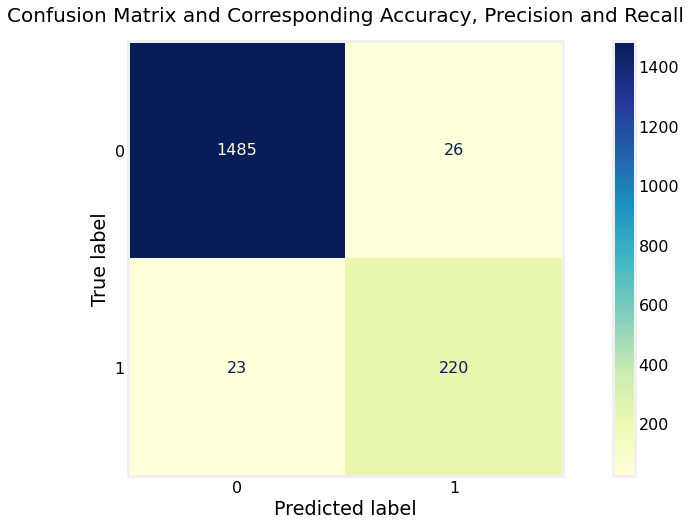

******************************
Accuracy : 0.9720638540478905
Precision : 0.9847480106100795
Recall : 0.9827928524156188
******************************


In [ ]:
cfm = confusion_matrix(y_true=y_test, y_pred=xgb_model.predict(X_test))

TP = cfm[0][0]
FN = cfm[0][1]
FP = cfm[1][0]
TN = cfm[1][1]


fig, ax = plt.subplots(figsize=(16, 8))
plt.rcParams.update({'font.size': 16}) # 내부 폰트사이즈 키우기
plt.title("Confusion Matrix and Corresponding Accuracy, Precision and Recall", size=20, pad=20)
plot_confusion_matrix(xgb_model, X_test, y_test, cmap='YlGnBu', ax=ax)
plt.grid(False)
plt.show()

print("*" * 30)
print("Accuracy :", (TP+TN)/(TP+TN+FP+FN))
print("Precision :", (TP)/(TP+FP))
print("Recall :", (TP)/(TP+FN))
print("*" * 30)

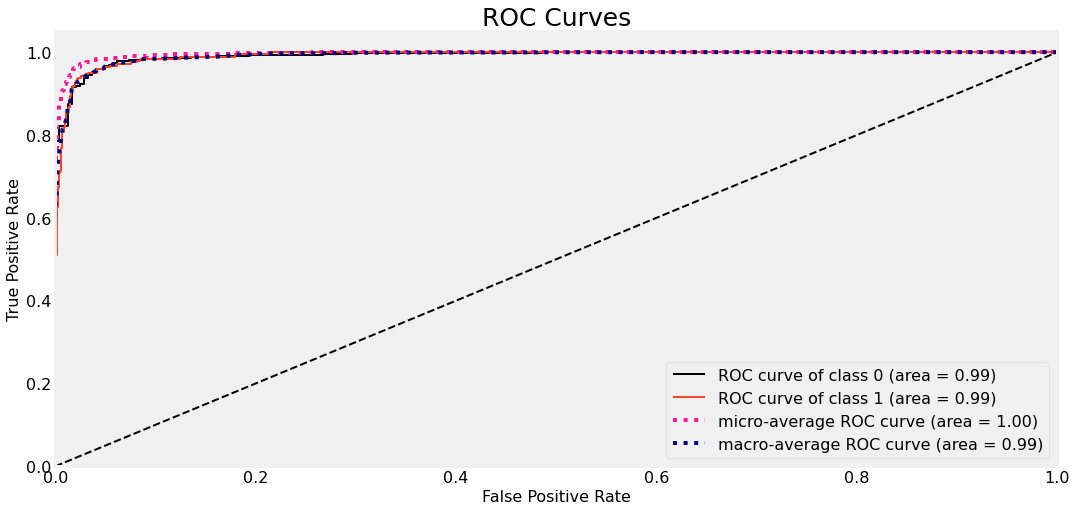

In [ ]:
#Checking the ROC curve

y_true = y_test
y_probas = xgb_model.predict_proba(X_test) # predicted probabilities generated by sklearn classifier

skplt.metrics.plot_roc(y_true, y_probas, figsize=(16,8), title_fontsize =25, text_fontsize=16, cmap = 'CMRmap')
plt.grid(False)
plt.show()

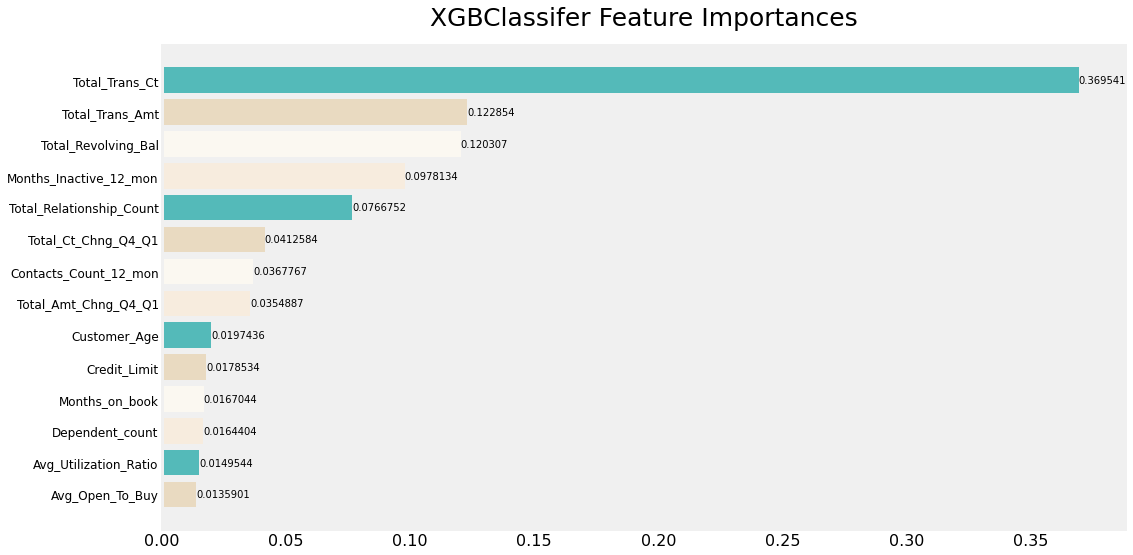

In [ ]:
feature_to_plot = 14 # feature 개수

importances = xgb_model.feature_importances_
indicies = np.argsort(importances)

best_vars = np.array(req_cols)[indicies][-feature_to_plot:]
values = importances[indicies][-feature_to_plot:]

best_vars

y_ticks = np.arange(0, feature_to_plot)
fig, ax = plt.subplots(figsize=(16, 8))
ax.barh(y_ticks, values, color=['#E9DAC1','#54BAB9','#F7ECDE','#FBF8F1'])
ax.set_yticklabels(best_vars, size=12)
ax.set_yticks(y_ticks) # 바에 맞게 라벨 붙이기
ax.set_title("XGBClassifer Feature Importances", size=25, pad=20, color='black')
ax.bar_label(ax.containers[0], size="10")
fig.tight_layout()
plt.grid(False)
plt.show()

📌은행은 수행된 탐색적 데이터 분석을 통해 어떤 고객이 이탈할 가능성이 높은지 충분히 파악할 수 있습니다.

📌이 XGBoost 분류기 모델을 사용하여 고객의 이탈 여부를 안전하게 예측할 수 있습니다.

📌은행에서는 기능의 중요성을 살펴봄으로써 필요한 개선 조치를 적용하여 추가적인 이탈을 완화할 수 있다.